In [1]:
import pandas as pd
import numpy as np

# Limpieza de datos
import re
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score, train_test_split
from pattern.text.en import singularize, lemma
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Modelos
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [2]:
data = pd.read_csv("./VirusSample.csv", usecols=lambda x: 'Unnamed' not in x)
print(len(data))
data.head()

9795


,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus


# Limpiando data

In [3]:
cachedStopWords = stopwords.words('english')
def removeStepWords(value):
  return ' '.join([word for word in value.split(',') if word not in cachedStopWords])

data["api"] = data["api"].apply(removeStepWords)

In [4]:
def parseLemma(value):
  try:
    return lemma(value)
  except:
    return value

def sentenceToPresent(value):
  items = value.split(' ')
  for item in items:
    present = parseLemma(item)
    value = value.replace(item, present)
  return value

data["api"] = data["api"].apply(sentenceToPresent)

In [5]:
def toSingular(value):
  try:
    return singularize(value)
  except:
    return value
    
def sentenceToSingular(value):
  items = value.split(' ')
  for item in items:
    singular = toSingular(item)
    value = value.replace(item, singular)
  return value

data["api"] = data["api"].apply(sentenceToSingular)

In [6]:
def removeSpecialChars(value):
    ayuda = re.sub(r"[^a-zA-Z ]",' ', value.lower())
    return ayuda

data["api"] = data["api"].apply(removeSpecialChars)

In [7]:
def removeExtraSpaces(value):
    return re.sub('  +', ' ', value) 

data["api"] = data["api"].apply(removeExtraSpaces)

In [8]:
data.drop(data[data["api"] == "empty"].index, inplace=True)

In [9]:
data.head()

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,intersectrect getcurrentproce getversion,Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,getcaretblinktime countclipboardformat getcons...,Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,varr pow getclipboardviewer getinputdesktop ge...,Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,settracecallback copyacceleratortablew getproc...,Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,shloadnonloadediconoverlayidentifier varui fro...,Virus


# Wordcloud

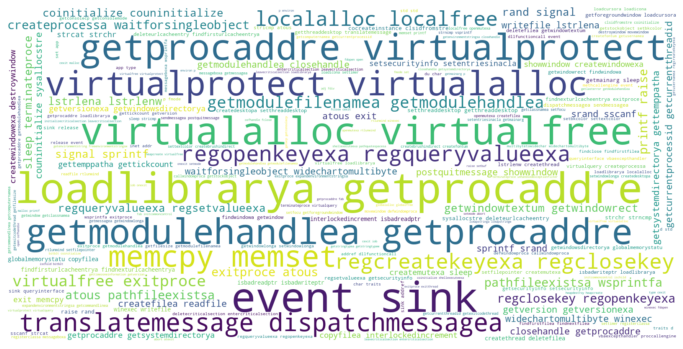

In [10]:
# wordcloud 
body_strings = data["api"].to_list()
body_strings = pd.Series(body_strings).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(body_strings)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [32]:
keyToVal = {}
valToKey = {}
for i, item in enumerate(list(data['class'].unique())):
  keyToVal[i] = item
  valToKey[item] = i

In [33]:
def replaceValToKey(value):
  return valToKey[value] 

data['class'] = data['class'].apply(replaceValToKey)

In [34]:
data.head()

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,intersectrect getcurrentproce getversion,0
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,getcaretblinktime countclipboardformat getcons...,0
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,varr pow getclipboardviewer getinputdesktop ge...,0
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,settracecallback copyacceleratortablew getproc...,0
4,021f4aa86b520e1d606ab26699c35546bcd00c27,shloadnonloadediconoverlayidentifier varui fro...,0


# Modelos

In [35]:
dataBodyList = data["api"].to_list()

In [36]:
bv = CountVectorizer(min_df=0.1, max_df=0.8, ngram_range=(2,10))
bv_matrix = bv.fit_transform(dataBodyList)
bv_matrix = bv_matrix.toarray()
vocabulario = bv.get_feature_names()
df_bv = pd.DataFrame(bv_matrix, columns=vocabulario)
df_bv

c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,getmodulehandlea getprocaddre,getprocaddre virtualprotect,getprocaddre virtualprotect virtualalloc,getprocaddre virtualprotect virtualalloc virtualfree,loadlibrarya getprocaddre,memcpy memset,regcreatekeyexa regclosekey,regopenkeyexa regqueryvalueexa,translatemessage dispatchmessagea,virtualalloc virtualfree,virtualprotect virtualalloc,virtualprotect virtualalloc virtualfree
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9790,0,0,0,0,0,0,0,0,0,0,0,0
9791,0,0,0,0,0,0,0,0,0,0,0,0
9792,0,0,0,0,0,0,0,0,0,0,0,0
9793,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
X = bv_matrix
y = data['class']
print (X.shape) 
print (y.shape) 

(9795, 12)
(9795,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Random Forest Classifier

In [39]:
randomForest = RandomForestClassifier(max_depth=12, random_state=42) 
randomForest = randomForest.fit(X_train, y_train)
y_preds = randomForest.predict(X_test)

In [40]:
print ('Accuracy:\t', accuracy_score(y_test, y_preds))
print ('Precision:\t', precision_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print ('Recall:\t\t', recall_score(y_test, y_preds, average='weighted'))
print ('F1:\t\t', f1_score(y_test, y_preds, average='weighted'))

# print('Cross-Validation', cross_val_score(randomForest, y_test, y_preds, cv=10))

Accuracy:	 0.720653283429738
Precision:	 0.8081590753485351
Recall:		 0.720653283429738
F1:		 0.7033449799681063


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 7. 7. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 7. 8. ... 7. 7. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 7. 8. ... 6. 7. 7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [17]:
#Se transforman las colunas usando los preprocesadores
numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocesador = ColumnTransformer([
    ('numerico', numeric_preprocessor, df_bv)
],remainder="passthrough")

In [18]:
modelo = make_pipeline(preprocesador, SVC(kernel="poly", C=32, degree=4))
modelo = modelo.fit(X_train, y_train)
y_preds = modelo.predict(X_test)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed